In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
img_dir=r"D:\aiml projects\Intra-Bhawan\input\PlantVillage"

In [3]:
import os

plant_label=[]
for file in os.listdir(img_dir):
    plant_label.append(file)

In [4]:
img_list=[]
label_list=[]

In [5]:
for label in plant_label:
    for file in os.listdir(img_dir+'/'+label):
        img_list.append(img_dir+'/'+label+'/'+file)
        label_list.append(label)

In [6]:
df = pd.DataFrame({'img':img_list,'label':label_list})
df.shape

(20638, 2)

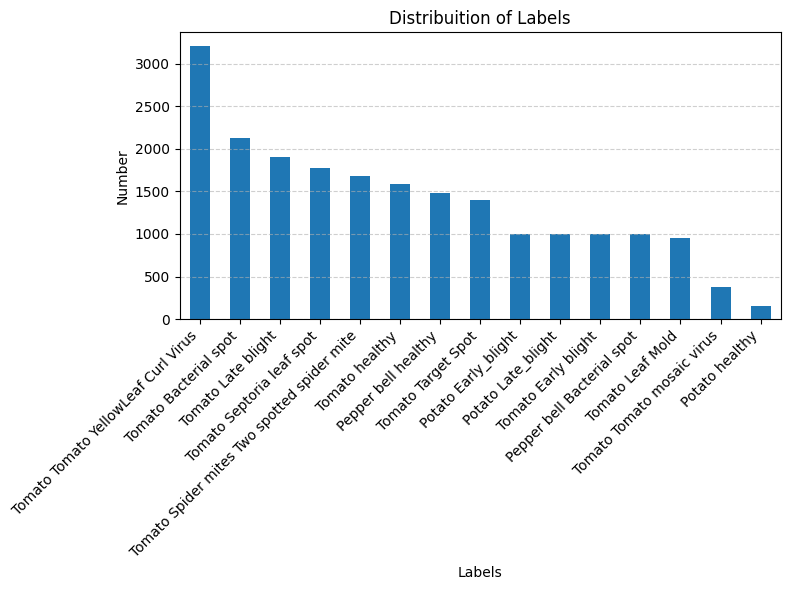

In [7]:
label_counts=df['label'].value_counts()

plt.figure(figsize=(8,6))
label_counts.plot(kind='bar')

plt.title('Distribuition of Labels')
plt.xlabel('Labels')
plt.ylabel('Number')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add subtle gridlines for readability
plt.tight_layout()

plt.show()

This dataset has high imbalance

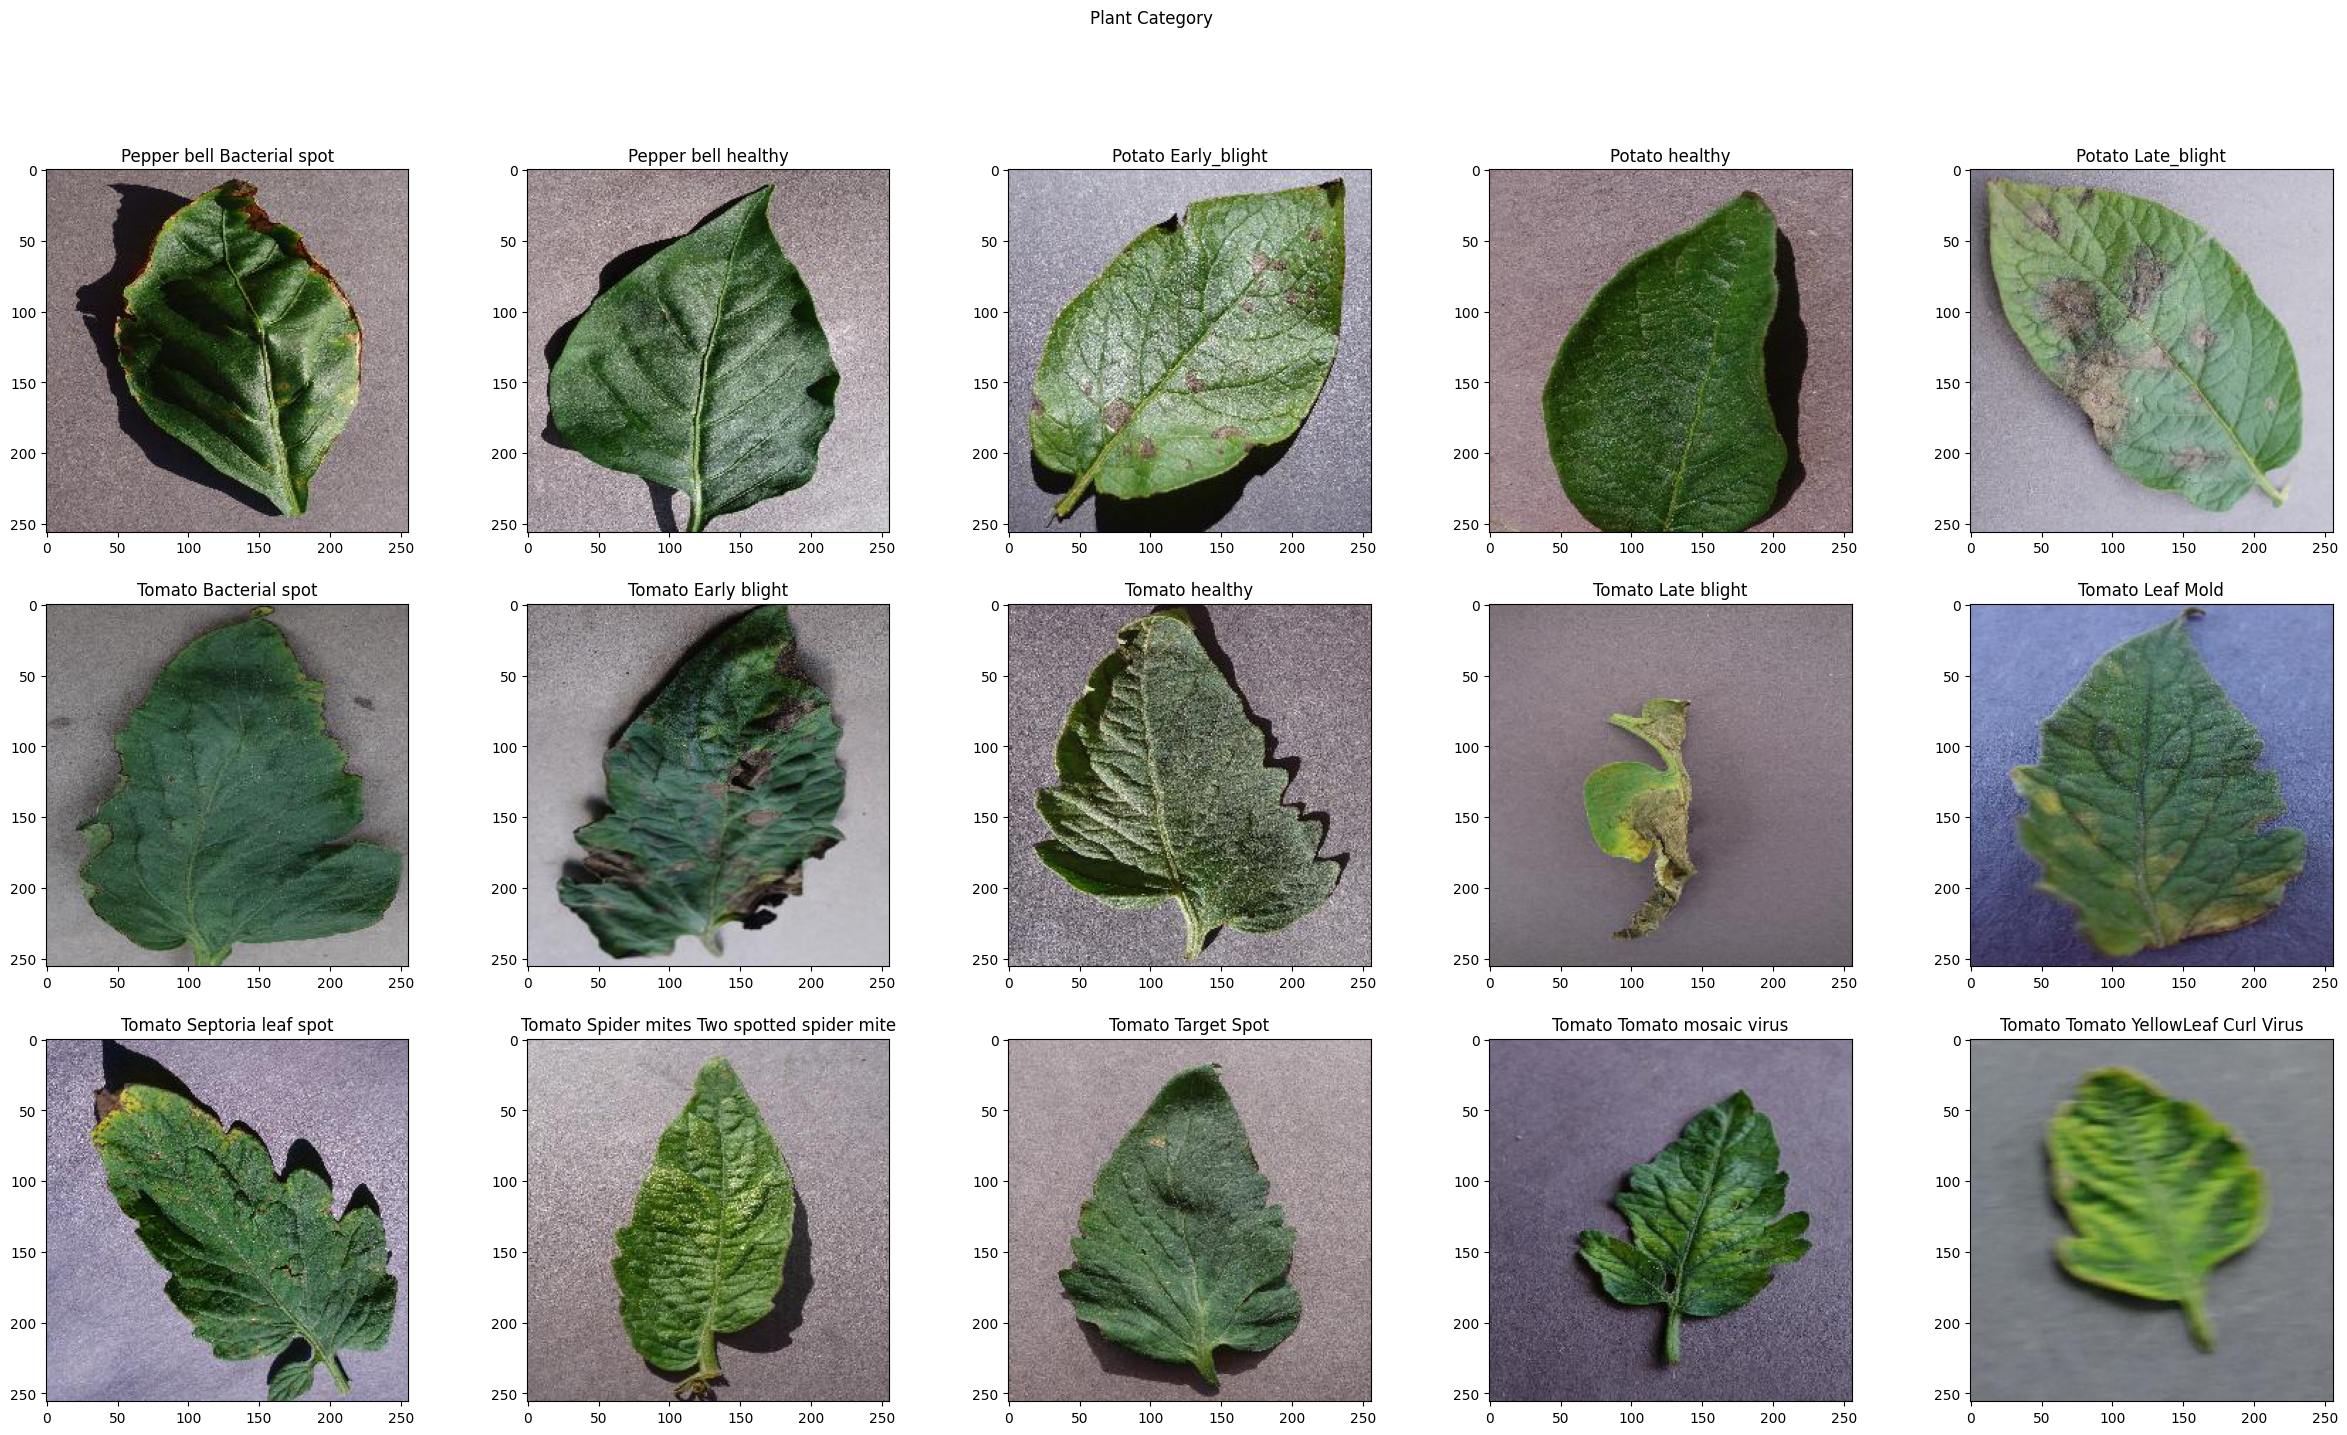

In [8]:
import random

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(30, 16))
fig.suptitle('Plant Category')

randomizer=random.randint(0,100)

for i,label in enumerate(plant_label):
    row= i//5
    col = i%5  # Column index remains the same
    ax[row, col].set_title(label)
    ax[row, col].imshow(plt.imread(df[df['label'] == label]['img'].iloc[randomizer]))


In [9]:
# import splitfolders

# splitfolders.ratio(input=img_dir, output=r"D:\aiml projects\Intra-Bhawan\input\splitted-data",
#     seed=42, ratio=(.8, .2), group_prefix=None, move=False) 


In [10]:
train_img_dir=r"D:\aiml projects\Intra-Bhawan\input\splitted-data\train"
val_img_dir=r"D:\aiml projects\Intra-Bhawan\input\splitted-data\val"

In [11]:
train_img_list=[]
train_label_list=[]

val_img_list=[]
val_label_list=[]

In [12]:
for label in plant_label:
    for file in os.listdir(train_img_dir+"/"+label):
        train_img_list.append(train_img_dir+"/"+label+"/"+file)
        train_label_list.append(label)

In [13]:
for label in plant_label:
    for file in os.listdir(val_img_dir+"/"+label):
        val_img_list.append(val_img_dir+"/"+label+"/"+file)
        val_label_list.append(label)

In [14]:
df_train=pd.DataFrame({'img':train_img_list,'label':train_label_list})

In [15]:
df_val=pd.DataFrame({'img':val_img_list,'label':val_label_list})

In [16]:
df_val['label'].value_counts()

label
Tomato Tomato YellowLeaf Curl Virus            642
Tomato Bacterial spot                          426
Tomato Late blight                             382
Tomato Septoria leaf spot                      355
Tomato Spider mites Two spotted spider mite    336
Tomato healthy                                 319
Pepper bell healthy                            296
Tomato Target Spot                             281
Pepper bell Bacterial spot                     200
Potato Early_blight                            200
Potato Late_blight                             200
Tomato Early blight                            200
Tomato Leaf Mold                               191
Tomato Tomato mosaic virus                      75
Potato healthy                                  31
Name: count, dtype: int64

In [17]:
df.to_csv(r"D:\aiml projects\Intra-Bhawan\input\ALLDATA.csv")

In [18]:
df_val_x=pd.DataFrame({'img': df_val['img']})

In [19]:
df_val_x

img
0     D:\aiml projects\Intra-Bhawan\input\splitted-d...
1     D:\aiml projects\Intra-Bhawan\input\splitted-d...
2     D:\aiml projects\Intra-Bhawan\input\splitted-d...
3     D:\aiml projects\Intra-Bhawan\input\splitted-d...
4     D:\aiml projects\Intra-Bhawan\input\splitted-d...
...                                                 ...
4129  D:\aiml projects\Intra-Bhawan\input\splitted-d...
4130  D:\aiml projects\Intra-Bhawan\input\splitted-d...
4131  D:\aiml projects\Intra-Bhawan\input\splitted-d...
4132  D:\aiml projects\Intra-Bhawan\input\splitted-d...
4133  D:\aiml projects\Intra-Bhawan\input\splitted-d...

[4134 rows x 1 columns]

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=0)
X_resampled, y_resampled=rus.fit_resample(df_val_x,df_val['label'])

In [21]:
y_resampled.value_counts()

label
Pepper bell Bacterial spot                     31
Pepper bell healthy                            31
Potato Early_blight                            31
Potato Late_blight                             31
Potato healthy                                 31
Tomato Bacterial spot                          31
Tomato Early blight                            31
Tomato Late blight                             31
Tomato Leaf Mold                               31
Tomato Septoria leaf spot                      31
Tomato Spider mites Two spotted spider mite    31
Tomato Target Spot                             31
Tomato Tomato YellowLeaf Curl Virus            31
Tomato Tomato mosaic virus                     31
Tomato healthy                                 31
Name: count, dtype: int64

In [22]:
df['label'].value_counts()

label
Tomato Tomato YellowLeaf Curl Virus            3208
Tomato Bacterial spot                          2127
Tomato Late blight                             1909
Tomato Septoria leaf spot                      1771
Tomato Spider mites Two spotted spider mite    1676
Tomato healthy                                 1591
Pepper bell healthy                            1478
Tomato Target Spot                             1404
Potato Early_blight                            1000
Potato Late_blight                             1000
Tomato Early blight                            1000
Pepper bell Bacterial spot                      997
Tomato Leaf Mold                                952
Tomato Tomato mosaic virus                      373
Potato healthy                                  152
Name: count, dtype: int64

In [23]:
df.to_csv(r"D:\aiml projects\Intra-Bhawan\input\PlantVillage\ALLDATA.csv")

In [24]:
oh=pd.get_dummies(df['label'])

In [25]:
oh.head()

Pepper bell Bacterial spot  Pepper bell healthy  Potato Early_blight  \
0                        True                False                False   
1                        True                False                False   
2                        True                False                False   
3                        True                False                False   
4                        True                False                False   

   Potato Late_blight  Potato healthy  Tomato Bacterial spot  \
0               False           False                  False   
1               False           False                  False   
2               False           False                  False   
3               False           False                  False   
4               False           False                  False   

   Tomato Early blight  Tomato Late blight  Tomato Leaf Mold  \
0                False               False             False   
1                False               False             False   
2                False               False             False   
3                False               False             False   
4                False               False             False   

   Tomato Septoria leaf spot  Tomato Spider mites Two spotted spider mite  \
0                      False                                        False   
1                      False                                        False   
2                      False                                        False   
3                      False                                        False   
4                      False                                        False   

   Tomato Target Spot  Tomato Tomato YellowLeaf Curl Virus  \
0               False                                False   
1               False                                False   
2               False                                False   
3               False                                False   
4               False                                False   

   Tomato Tomato mosaic virus  Tomato healthy  
0                       False           False  
1                       False           False  
2                       False           False  
3                       False           False  
4                       False           False

In [26]:
targets=oh.to_numpy()

In [27]:
targets=torch.tensor(targets)

In [28]:
targets.dtype

torch.bool

In [29]:
targets=targets.type(torch.float)

In [30]:
torch.cuda.is_available()

True